In [1]:
import matplotlib
matplotlib.use('Agg')
import visual_behavior.ophys.mesoscope.mesoscope as ms
import visual_behavior.ophys.mesoscope.utils as mu
import visual_behavior.ophys.mesoscope.crosstalk_unmix as ica

In [2]:
session = 988768058
ica_obj = ica.MesoscopeICA(session_id=session, cache='/media/rd-storage/Z/MesoscopeAnalysis/')
pairs = ica_obj.dataset.get_paired_planes()
pairs

[[989213058, 989213059],
 [989213060, 989213061],
 [989213062, 989213063],
 [989213064, 989213065]]

In [3]:
pair = pairs[0]

In [7]:
# Load ICA output traces

import os
import h5py

ica_obj.set_ica_roi_dir(pair)
a = ica_obj.plane1_ica_output_pointer
plane1_ica_output_pointer = os.path.join(os.path.dirname(a), f'traces_ica_output_{pair[0]}.h5')
plane2_ica_output_pointer = os.path.join(os.path.dirname(a), f'traces_ica_output_{pair[1]}.h5')

with h5py.File(plane1_ica_output_pointer, "r") as f:
    plane1_ica_output = f["data"][()]
    
with h5py.File(plane2_ica_output_pointer, "r") as f:
    plane2_ica_output = f["data"][()]
    
print(plane1_ica_output.shape) # signal, crosstalk: # plane1_ica_output = np.array([plane1_out_sig, plane1_out_ct])
print(plane2_ica_output.shape)    


OSError: Unable to open file (unable to open file: name = '/media/rd-storage/Z/MesoscopeAnalysis/session_988768058/roi_ica_989213058_989213059/traces_ica_output_989213058.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Get the cross-talk plane

plane1_out_ct = plane1_ica_output[1]
# print(plane1_out_ct.shape)


In [17]:
from visual_behavior.ophys.mesoscope import set_traces_active

# import importlib
# importlib.reload(set_traces_active)

# %load_ext autoreload
# system("jupyter" "notebook" "list")


<module 'visual_behavior.ophys.mesoscope.set_traces_active' from '/home/farzaneh.najafi/analysis_codes/visual_behavior_analysis/visual_behavior/ophys/mesoscope/set_traces_active.py'>

/home/farzaneh.najafi/analysis_codes/visual_behavior_analysis/visual_behavior/ophys/mesoscope/set_traces_active.py:336: RuntimeWarning: divide by zero encountered in log
  erf = np.log(erf)
DEBUG:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


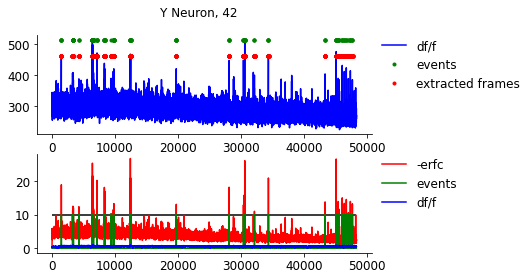

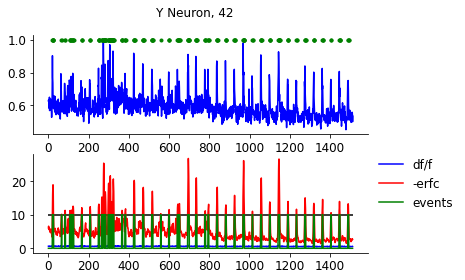

In [18]:
# Make traces_events ("active trace") for plane1_out_ct

traces_y0 = plane1_out_ct

len_ne = 20 # number of frames before and after each event that are taken to create traces_events.
th_ag = 10 #8 # threshold to apply on erfc (output of evaluate_components) to find events on the trace; the higher the more strict on what we call an event.
doPlots = 1 # set to 1 to see an example neuron

## call the function to set traces_evs (for the y trace), ie traces that are made by extracting the active parts of the input trace
# the idea is that to help with learning the events, take parts of the trace that have events        
[traces_y0_evs, inds_final_all] = set_traces_active.set_traces_evs(traces_y0, th_ag, len_ne, doPlots)


In [20]:
for pair in pairs:
    ica_obj.get_ica_traces(pair)
    ica_obj.validate_traces()
    ica_obj.combine_debias_traces()
    ica_obj.combine_debias_neuropil()
    ica_obj.unmix_traces(max_iter=50)
    ica_obj.unmix_neuropil(max_iter=50)
    ica_obj.plot_ica_traces(pair, samples_per_plot=1000, figsave = True, figshow = False)

INFO:Found traces in cache, reading from h5 file
INFO:Debiased ROI traces exist in cache, reading from h5 file
INFO:Debiased neuropil traces exist in cache, reading from h5 file
INFO:Unmixed traces exist in cache, reading from h5 file
INFO:Unmixed neuropil traces exist in cache, reading from h5 file
INFO:creating figures for experiment 989213058
INFO:Cell 989471154 is invalid, skipping plotting
INFO:creating figures for cell 989471155
DEBUG:Assigning font /b'F1' = '/home/nataliao/miniconda3/envs/mesoscope/lib/python3.6/site-packages/matplotlib-3.1.1-py3.6-linux-x86_64.egg/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG:Embedding font /home/nataliao/miniconda3/envs/mesoscope/lib/python3.6/site-packages/matplotlib-3.1.1-py3.6-linux-x86_64.egg/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG:Writing TrueType font.
INFO:Cell 989471158 is invalid, skipping plotting
INFO:Cell 989471159 is invalid, skipping plotting
INFO:Cell 989471161 is invalid, skipping plotting
INFO:Cell 989471164 

In [25]:
ica_obj.

AttributeError: 'MesoscopeICA' object has no attribute 'keys'

In [26]:
mu.run_demixing_on_ica(session, an_dir = '/media/rd-storage/Z/MesoscopeAnalysis/')

/home/nataliao/miniconda3/envs/mesoscope/lib/python3.6/site-packages/pandas-0.25.1-py3.6-linux-x86_64.egg/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
INFO:Demixed traces exist for experiment 989213058, skipping demixing
INFO:Demixed traces exist for experiment 989213059, skipping demixing
INFO:Demixed traces exist for experiment 989213060, skipping demixing
INFO:Demixed traces exist for experiment 989213061, skipping demixing
INFO:Demixed traces exist for experiment 989213062, skipping demixing
INFO:Demixed traces exist for experiment 989213063, skipping demixing
INFO:Demixed traces exist for experiment 989213064, skipping demixing
INFO:Demixed traces exist for experiment 989213065, skipping demixing


In [27]:
mu.run_neuropil_correction_on_ica(session, an_dir = '/media/rd-storage/Z/MesoscopeAnalysis/')

INFO:Neuropil corrected traces exist for experiment 989213058, skipping neuropil correction
INFO:Neuropil corrected traces exist for experiment 989213059, skipping neuropil correction
INFO:Neuropil corrected traces exist for experiment 989213060, skipping neuropil correction
INFO:Neuropil corrected traces exist for experiment 989213061, skipping neuropil correction
INFO:Neuropil corrected traces exist for experiment 989213062, skipping neuropil correction
INFO:Neuropil corrected traces exist for experiment 989213063, skipping neuropil correction
INFO:Neuropil corrected traces exist for experiment 989213064, skipping neuropil correction
INFO:Neuropil corrected traces exist for experiment 989213065, skipping neuropil correction


In [28]:
mu.run_dff_on_ica(session, an_dir = '/media/rd-storage/Z/MesoscopeAnalysis/')

INFO:df/f traces exist for experiment 989213058 in /media/rd-storage/Z/MesoscopeAnalysis/session_988768058/989213058_dff.h5
INFO:df/f traces exist for experiment 989213059 in /media/rd-storage/Z/MesoscopeAnalysis/session_988768058/989213059_dff.h5
INFO:df/f traces exist for experiment 989213060 in /media/rd-storage/Z/MesoscopeAnalysis/session_988768058/989213060_dff.h5
INFO:df/f traces exist for experiment 989213061 in /media/rd-storage/Z/MesoscopeAnalysis/session_988768058/989213061_dff.h5
INFO:df/f traces exist for experiment 989213062 in /media/rd-storage/Z/MesoscopeAnalysis/session_988768058/989213062_dff.h5
INFO:df/f traces exist for experiment 989213063 in /media/rd-storage/Z/MesoscopeAnalysis/session_988768058/989213063_dff.h5
INFO:df/f traces exist for experiment 989213064 in /media/rd-storage/Z/MesoscopeAnalysis/session_988768058/989213064_dff.h5
INFO:df/f traces exist for experiment 989213065 in /media/rd-storage/Z/MesoscopeAnalysis/session_988768058/989213065_dff.h5
